In [1]:
import numpy as np
import numpy.linalg as linalg

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [40]:
n = 100000
max_degree = 35

degs = np.arange(1, max_degree+1)

mse_train = np.zeros(len(degs))
mse_test = np.zeros(len(degs))
mse_train_scaled = np.zeros(len(degs))
mse_test_scaled = np.zeros(len(degs))

r2_train = np.zeros(len(degs))
r2_test = np.zeros(len(degs))
r2_train_scaled = np.zeros(len(degs))
r2_test_scaled = np.zeros(len(degs))

#np.random.seed(100)
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.5, x.shape)

for deg in degs:
    poly = PolynomialFeatures(degree=deg)
    X = poly.fit_transform(x)

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # scaled
    clf = LinearRegression()
    clf.fit(X_train_scaled, y_train)
    y_pred_train = clf.predict(X_train_scaled)
    y_pred_test = clf.predict(X_test_scaled)
    
    mse_train_scaled[deg-1] = mean_squared_error(y_train, y_pred_train)
    mse_test_scaled[deg-1] = mean_squared_error(y_test, y_pred_test)
    
    r2_train_scaled[deg-1] = r2_score(y_train, y_pred_train)
    r2_test_scaled[deg-1] = r2_score(y_test, y_pred_test)

    # unscaled
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    mse_train[deg-1] = mean_squared_error(y_train, y_pred_train)
    mse_test[deg-1] = mean_squared_error(y_test, y_pred_test)
    
    r2_train[deg-1] = r2_score(y_train, y_pred_train)
    r2_test[deg-1] = r2_score(y_test, y_pred_test)
    

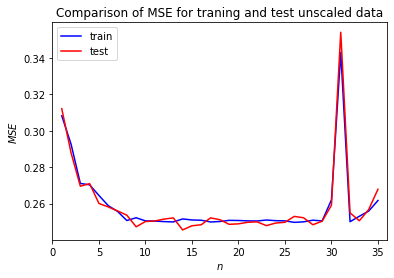

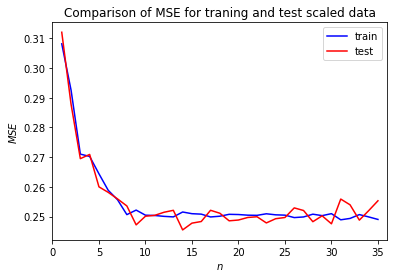

In [41]:
plt.figure(1)

plt.plot(degs, mse_train, '-b', label="train")
plt.plot(degs, mse_test, '-r', label="test")
plt.legend()

plt.xlabel(r"$n$")
plt.ylabel(r"$MSE$")
plt.title("Comparison of MSE for traning and test unscaled data")

plt.xlim([0, max_degree+1])

plt.figure(2)

plt.plot(degs, mse_train_scaled, '-b', label="train")
plt.plot(degs, mse_test_scaled, '-r', label="test")
plt.legend()

plt.xlabel(r"$n$")
plt.ylabel(r"$MSE$")
plt.title("Comparison of MSE for traning and test scaled data")

plt.xlim([0, max_degree+1])

plt.show()